Pratyush Singh - Lab 6

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Problem 1
For the LHC data, we are going to fake a background. We will make a Poisson background with mean 100. Then we will determine where the 5-sigma sensitivity threshold is.

In [2]:
sig = stats.norm.cdf(5)   
ans= stats.poisson.ppf(sig,100)
print("The threshold value is: ", ans)

The threshold value is:  154.0


In [3]:
r = stats.poisson.rvs(100,size=1000000)

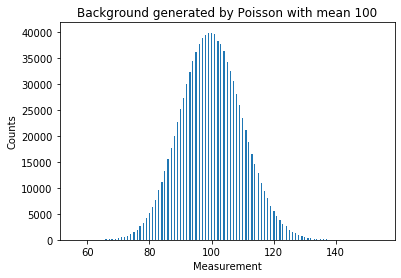

In [4]:
plt.hist(r,bins=250)
plt.ylabel("Counts")
plt.xlabel("Measurement")
plt.title("Background generated by Poisson with mean 100")
plt.show()

## 2a 2b
We now need to generate the signal which will also be counting particle events. This means that our signal will also be Poisson distributed. We want the signal to be in the $8\sigma$ to $30\sigma$ range. We will pick 250 as the mean value for this Poisson signal injection, which falls within that range.

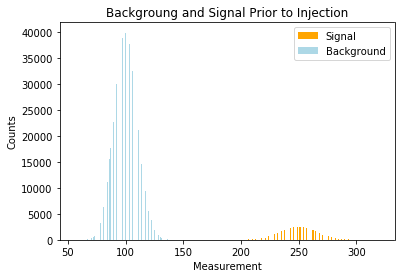

In [5]:
signal_mean = 250
signal = stats.poisson.rvs(signal_mean,size=100000)
plt.hist([signal, r], bins = 400, color=['orange','lightblue'],label=['Signal', 'Background'])
plt.title("Backgroung and Signal Prior to Injection")
plt.xlabel("Measurement")
plt.ylabel("Counts")
plt.legend()
plt.show()

From the plot above, we can confirm that signal is a Poisson distribution with a mean of 250. We can also see that there is no overlab between the two distributions here. Let's see what happens when we inject the signal into our background.

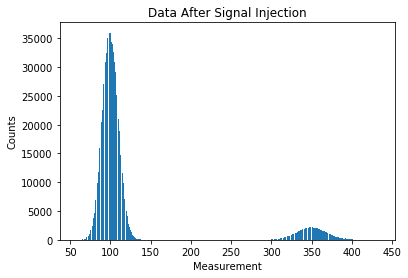

In [6]:
mixed = np.zeros(r.size)
for i in range(mixed.size):
    if i < signal.size:
        mixed[i] = np.add(r[i], signal[i])
    else:
        mixed[i] = r[i]
plt.hist(mixed,bins = 450)
plt.title('Data After Signal Injection')
plt.xlabel('Measurement')
plt.ylabel('Counts')
plt.show()

As we can see now, the mean has moved to 350. From the prior graph we note that mean was 250, which means that it has moved 100 to the right. This number is also the mean on our Poisson distributed background. This is because now we have both the background and the signal together, which means that both events are happening at the same time now. Because we are now taking both into account the average measurement is now going to be 100 + 250 which gives us the expected 350. <br>
The shape has been retained because the sum of two Poisson distributions is still a Poisson. The measurement we are getting here is that of both- the background and the signal. Which follows that the overall measurement is greater than a measurement of just the background.

## 3a
Simulation: For each given mean, we simulate a signal of the given mean, sample from the background and the signal, and then add them together, which simulates the events we would see in the simulated situation of the distribution being the background plus the signal.

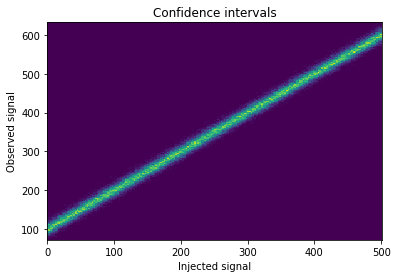

In [7]:
num = 100000
lins = np.linspace(0, 501, num)
a1 = stats.poisson.rvs(100, size=num)

signal = np.add(a1, lins)
    
plt.hist2d(lins, signal, num / 500)
plt.xlabel('Injected signal')
plt.ylabel('Observed signal')
plt.title('Confidence intervals')
plt.show()

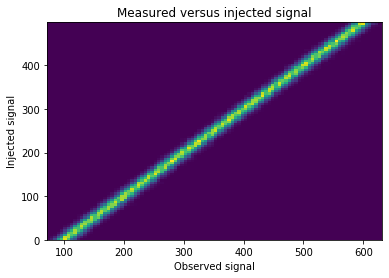

In [8]:
n = 100
inj = np.array([])
obs = np.array([])

sigs = range(500)
for i in sigs:
    a1 = stats.poisson.rvs(100, size=n * 2)
    for j in a1:
        inj = np.append(inj, i)
        obs = np.append(obs, j + i)

plt.hist2d(obs, inj, bins = n)
plt.title('Measured versus injected signal')
plt.xlabel('Observed signal')
plt.ylabel('Injected signal')
plt.show()


## 3B
In order to check with the previous result, we sample from the background many times and add to each sampled value the mean of the signal we had in the previously (250).

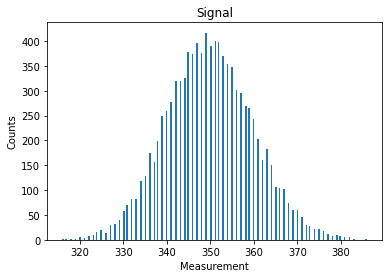

In [10]:
a1 = stats.poisson.rvs(100, size = 10000)
b1 = np.array([])
signal = 250
for i in a1:
    b1 = np.append(b1, i + signal)
    
plt.hist(b1, bins = 200)
plt.title('Signal')
plt.xlabel('Measurement')
plt.ylabel('Counts')
plt.show()

We see a Poisson distribution with a mean of 350, which is what we had before.

## 3C
Now we reverse, so we want to know the what the original injected signal was from the observed one. We saw from previous questions that they only were offset by the mean, so we can subtrack the background and be left with the signal. For this example we will use mean of 400.

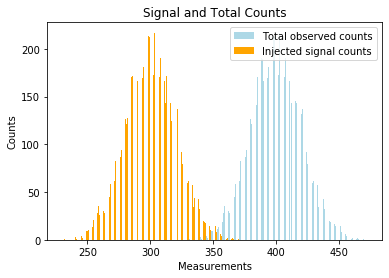

In [14]:
new_mean = 400
bg_mean = 100
new_sample = stats.poisson.rvs(new_mean, size=10000)
al = np.array([])
for i in new_sample:
    al = np.append(al, i - bg_mean)
    
plt.hist([new_sample, al], bins = 250, color=['lightblue', 'orange'], label=['Total observed counts', 'Injected signal counts'])
plt.title('Signal and Total Counts')
plt.xlabel('Measurements')
plt.ylabel('Counts')
plt.legend()
plt.show()

We can confirm again that these distributions look like previous distributions. The injected signal distribution is independent of the background, it is made from the signal alone and without contribution from the background.

## 3D 3E
We can start by normalizing to obtain a pdf. We can then integrate it from the mean to the 1 sigma probability on both sides.